# User Guide - Prueba NLP

## Importar módulos

In [2]:
import sys
sys.path.append("../")

import pandas as pd
from src.majorel.graphs import countplot, histplot
from src.majorel.preprocessing import Preprocessing
from src.majorel.model.sentiment_analysis import SentimentAnalysis
from src.majorel.model.model_task import ClassificationTask
from src.majorel.model._utils import group_function

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p_san\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
datos = pd.read_csv("../data/political_social_media.csv")

# Análisis Descriptivo

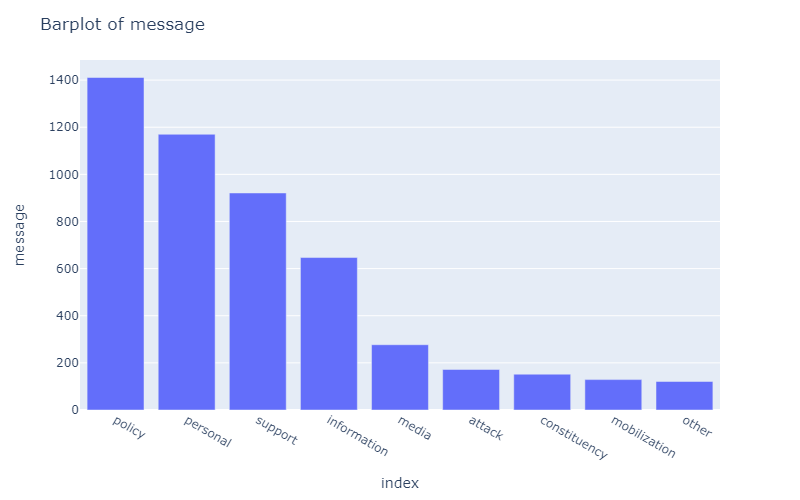

In [4]:
countplot(data=datos,
          target="message",
          static_plot=True)

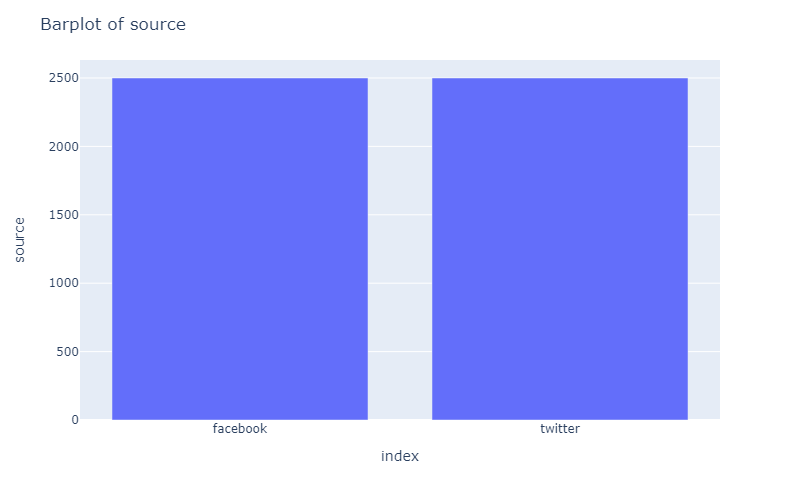

In [5]:
countplot(data=datos,
          target="source",
          static_plot=True)

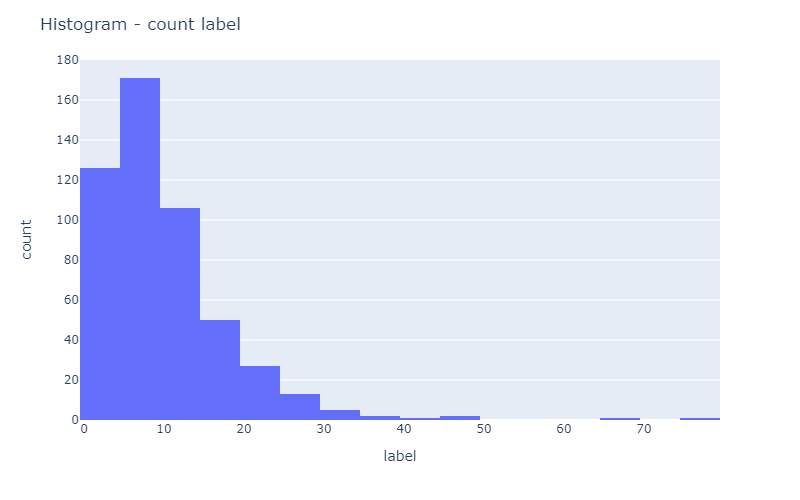

In [6]:
histplot(data=datos, target="label", static_plot=True)

# Preprocesado del texto

In [7]:
preprocessing = Preprocessing(mention=True,
                              url=True,
                              hashtags=False,
                              retweet=True,
                              lower=False,
                              lemmatization=False,
                              points=True,
                              stop_words=False,
                              truncate=True,
                              n_truncate=256)

In [8]:
datos = preprocessing.select_columns(datos, columns_name=["_unit_id", "source", "message", "text", "label"])
datos["processing_text"] = preprocessing.preprocessing_data(datos, "text")

# Predicción de la temática

In [9]:
topic_classification = ClassificationTask(task="zero-shot-classification",
                                          model_name="facebook/bart-large-mnli")

In [10]:
candidate_labels = ['economy finance',
                    'health service',
                    'war military',
                    'violence crime',
                    'inmigration racism',
                    'foreign policy',
                    'public administration',
                    'education school',
                    'other']

topic_df = topic_classification.get_task(datos, "processing_text", split_num=100, labels_topic=candidate_labels)

In [11]:
topic_df

,sequence,labels,scores
0,Rep Trey Radel R FL slams Obamacare politics,health service,0.848999
1,Rep Trey Radel R FL slams Obamacare politics,other,0.180924
2,Rep Trey Radel R FL slams Obamacare politics,public administration,0.136950
3,Rep Trey Radel R FL slams Obamacare politics,violence crime,0.007708
4,Rep Trey Radel R FL slams Obamacare politics,inmigration racism,0.000818
...,...,...,...
4,My interview w Schweikert on Huge meeting com...,education school,0.016964
5,My interview w Schweikert on Huge meeting com...,inmigration racism,0.008886
6,My interview w Schweikert on Huge meeting com...,violence crime,0.007114
7,My interview w Schweikert on Huge meeting com...,war military,0.005976


## Análisis de Sentimiento

In [12]:
sentimental_analysis = ClassificationTask(task="sentiment-analysis",
                                          model_name="nlptown/bert-base-multilingual-uncased-sentiment")

df_sentiment = sentimental_analysis.get_task(datos, "processing_text", split_num=100)

In [13]:
df_sentiment

,label_sentiment,score_sentiment
0,1 star,0.356802
1,1 star,0.378716
2,5 stars,0.695568
3,5 stars,0.420357
4,4 stars,0.261369
...,...,...
95,5 stars,0.613088
96,5 stars,0.291694
97,1 star,0.245001
98,4 stars,0.485957
